In [ ]:
import pandas as pd
import numpy as np
import re
import string

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import collections

import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mental_health.csv to mental_health.csv


In [ ]:
#!wget http://nlp.stanford.edu/data/glove.42B.300d.zip
#!apt install unzip
#!unzip "glove.42B.300d.zip"

In [ ]:
data = pd.read_csv('mental_health.csv')

dataser source : https://www.kaggle.com/datasets/reihanenamdari/mental-health-corpus

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


In [ ]:
data.describe()

,label
count,27977.000000
mean,0.494621
std,0.499980
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
data.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [ ]:
data['text'][0]

'dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like  right guys learn math'

In [ ]:
data['label'].value_counts()

0    14139
1    13838
Name: label, dtype: int64

In [ ]:
neg_comment = len(data[data['label'] == 1])
pos_comment = len(data[data['label'] == 0])

print(f"Negative comment : {neg_comment}")
print(f"Positive comment : {pos_comment}")

plt.bar(["Negative", "Positive"], [neg_comment, pos_comment], color=['red','green'])
plt.title("Counts of Negative vs Neutral/Positive Comments")
plt.show()

NameError: ignored

### Check & Remove Duplicated Data

In [ ]:
data.isna().sum()

text     0
label    0
dtype: int64

In [ ]:
index = 0
duplicated_index = []
for i in data.duplicated():
  if i == True:
    print(index)
    duplicated_index.append(index)
  index += 1

print(f"Total index/rows : {index}")
print(f"Total duplicated data : {len(duplicated_index)}")

# data_duplicated = data[data.duplicated(keep=False)]
# print(data_duplicated)
# print(f"Total duplicated data : {len(data_duplicated)}")

In [ ]:
for i in duplicated_index:
  print(data['text'][i])

In [ ]:
updated_data = data.drop(duplicated_index)
updated_data.shape

## Data Pre-Processing

In [ ]:
def pre_process(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove whitespaces
    #text = text.strip()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(filtered_tokens)

    # Remove http addresses
    text = re.sub(r'http\S+|www\S+', '', text)

    # Lemmatization
    #lemmatizer = WordNetLemmatizer()
    #tokens = word_tokenize(text)
    #lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    #text = ' '.join(lemmatized_tokens)

    return text

In [ ]:
data['text'] = data['text'].apply(pre_process)

In [ ]:
print(data['text'].head(10))


0    dear american teens question dutch person hear...
1    nothing look forward lifei dont many reasons k...
2    music recommendations im looking expand playli...
3    im done trying feel betterthe reason im still ...
4    worried year old girl subject domestic physica...
5    hey rredflag sure right place post goes im cur...
6    feel like someone needs hear tonight feeling r...
7    deserve liveif died right noone would carei re...
8    feels good ive set dateim killing friday nice ...
9    live guiltok made stupid random choice getting...
Name: text, dtype: object


In [ ]:
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd


# Create DataFrame and save to CSV
df_train = pd.DataFrame({'text': X_train})
df_train.to_csv('X_train.csv', index=False)


In [ ]:
print(X_train)

15132    even point anymoreeven go feel better distract...
27332    im sorry guysive posted lot past everyone real...
17813    im love berleezy bro he literally perfect bro ...
18773    well ive hit rock bottom high schoolerthats no...
25399    clarify never told anyone wanted die never som...
                               ...                        
21575    im garbage human beingim waste existence oh fu...
5390     hello new account new right think id like let ...
860      depressive mood pushed away loved one im afrai...
15795    smh bad thought probably going delete lmao als...
23654    anyone else go bike ride get away parent bullshit
Name: text, Length: 22381, dtype: object


In [ ]:
# Tokenization and padding
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
# Print the shape of the preprocessed data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (22381, 100)
X_test shape: (5596, 100)
y_train shape: (22381,)
y_test shape: (5596,)


In [ ]:
# Define the model
embedding_dim = 32
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(64, dropout=0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 344,897
Trainable params: 344,897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
batch_size = 64
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/10
350/350 [==============================] - 61s 173ms/step - loss: 0.3159 - accuracy: 0.8616 - val_loss: 0.2110 - val_accuracy: 0.9187
Epoch 2/10
350/350 [==============================] - 25s 70ms/step - loss: 0.1774 - accuracy: 0.9345 - val_loss: 0.2146 - val_accuracy: 0.9235
Epoch 3/10
350/350 [==============================] - 14s 40ms/step - loss: 0.1425 - accuracy: 0.9478 - val_loss: 0.2291 - val_accuracy: 0.9230
Epoch 4/10
350/350 [==============================] - 12s 33ms/step - loss: 0.1172 - accuracy: 0.9580 - val_loss: 0.2365 - val_accuracy: 0.9190
Epoch 5/10
350/350 [==============================] - 8s 24ms/step - loss: 0.0988 - accuracy: 0.9651 - val_loss: 0.2553 - val_accuracy: 0.9151
Epoch 6/10
350/350 [==============================] - 7s 19ms/step - loss: 0.0877 - accuracy: 0.9695 - val_loss: 0.2526 - val_accuracy: 0.9083
Epoch 7/10
350/350 [==============================] - 7s 21ms/step - loss: 0.0748 - accuracy: 0.9738 - val_loss: 0.2836 - val_accuracy: 0

In [ ]:
# Menampilkan akurasi dari model
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print(f"Training Accuracy: {accuracy[-1]}")
print(f"Validation Accuracy: {val_accuracy[-1]}")

Training Accuracy: 0.9768553972244263
Validation Accuracy: 0.905110776424408


In [ ]:
#model = keras.models.load_model('glove_lstm.keras')

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

175/175 [==============================] - 2s 9ms/step - loss: 0.3396 - accuracy: 0.9051
Test Loss: 0.33961933851242065
Test Accuracy: 0.905110776424408


In [ ]:
Loss = history.history['loss']
val_loss = history.history['val_loss']

print(f"Loss: {Loss[-1]}")
print(f"Validation Loss: {val_loss[-1]}")

Loss: 0.06426012516021729
Validation Loss: 0.33961930871009827


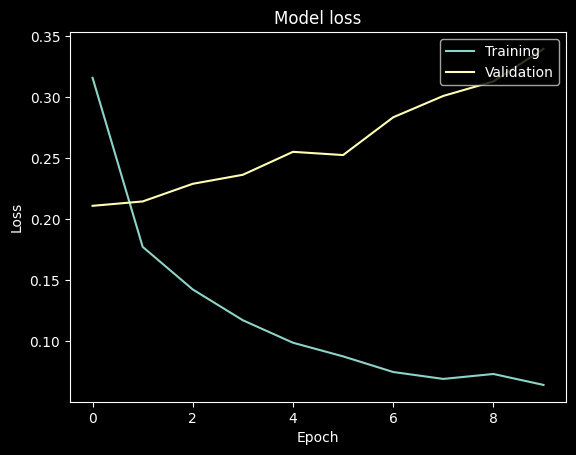

In [ ]:
# Loss graph

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper right')
plt.show()

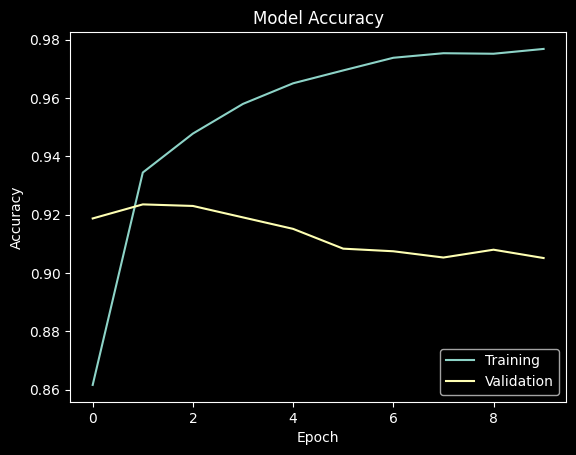

In [ ]:
# Accuracy graph

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'lower right')
plt.show()

In [ ]:
model.save("sentiment_model.h5")

In [ ]:
from keras.models import load_model
loaded_model = load_model("sentiment_model.h5")

In [ ]:
def preprocess_input(text):
    # Apply the same preprocessing steps as before
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(filtered_tokens)
    text = re.sub(r'http\S+|www\S+', '', text)
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text = ' '.join(lemmatized_tokens)
    return text

def predict_sentiment(text):
    preprocessed_text = preprocess_input(text)
    input_sequence = tokenizer.texts_to_sequences([preprocessed_text])
    padded_sequence = pad_sequences(input_sequence, maxlen=max_len)
    prediction = model.predict((padded_sequence))
    sentiment = "positive" if prediction[0] >= 0.5 else "negative"
    return prediction

# Sample prediction
diary_entry = "I am so sad"
prediction = predict_sentiment(diary_entry)
print("Sentiment prediction:", prediction)
#print("Model's prediction : ", )

1/1 [==============================] - 0s 104ms/step
Sentiment prediction: [[0.35598597]]


In [ ]:
import numpy as np

# Function to preprocess the text
#def preprocess_text(text):
    # Apply necessary preprocessing steps
    # ...

    #return preprocessed_text

# Function to make predictions
def predict_sentiment(text):
    # Preprocess the text
    processed_text = pre_process(text)

    # Tokenize and pad the text
    sequence = tokenizer.texts_to_sequences([processed_text])
    sequence = pad_sequences(sequence, maxlen=max_len)

    # Make the prediction
    prediction = model.predict(sequence)
    sentiment = 'Positive' if prediction > 0.5 else 'Negative'

    return sentiment

# Example diary entry
diary_entry = """
Dear Diary,

Today has been an incredible day filled with joy and happiness. From the moment I woke up, I felt a sense of excitement and positivity flowing through me. The sun was shining brightly, and the birds were singing their cheerful melodies.

I had a wonderful time with my loved ones. We spent the day outdoors, exploring nature and creating beautiful memories. We laughed, shared stories, and enjoyed each other's company. It's amazing how spending time with the people you love can uplift your spirits and bring immense happiness.

In the afternoon, I received some fantastic news. I achieved a significant milestone in my career that I had been working hard for. The feeling of accomplishment and pride overwhelmed me. It's a reminder that hard work and perseverance truly pay off, and it fills me with gratitude and satisfaction.

As the day went on, I couldn't help but appreciate the little things that brought me joy. The aroma of freshly brewed coffee, the vibrant colors of blooming flowers, and the gentle breeze against my skin. These simple pleasures reminded me to find happiness in the present moment and appreciate the beauty that surrounds me.

In the evening, I took some time for self-care. I indulged in my favorite hobby, painting. The act of creating something from a blank canvas brought me immense joy and allowed me to express my creativity freely. It's a therapeutic activity that nourishes my soul and brings a sense of peace and contentment.

Now, as I write this entry, I am filled with gratitude for this beautiful day. It's a reminder that happiness can be found in the simplest of things and that life is meant to be cherished and celebrated.

With a heart full of joy,
[Your Name]
"""

# Make the prediction
predicted_sentiment = predict_sentiment(diary_entry)

# Display the result
print(f"Predicted Sentiment: {predicted_sentiment}")
